In [1]:
import requests
import pandas as pd


def pull_data_from_db():
    """
    Pulls data from online UCI databases and collates them
    """
    base_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/'
    # Pulling processed data as it is in the most usable format but still needs to be cleaned (missing data)
    options = [
        'processed.cleveland.data',
        'processed.hungarian.data',
        'processed.switzerland.data',
        'processed.va.data',
    ]
    columns = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalanch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
    ]

    # This chunk parses the online data into float arrays where it can and adds it to all_data together
    all_data = []
    for o in options:
        req = requests.get(base_data_url + o)
        if req.status_code != 200:
            raise requests.exceptions.ConnectionError(f'Data URL {base_data_url + o} invalid. Please check the URL is valid.')
        content = [y.split(',') for y in req.content.decode('utf-8').split('\n') if len(y) > 1]
        for i in range(len(content)):
            for j in range(len(content[i])):
                if content[i][j] == '?':
                    continue
                content[i][j] = float(content[i][j])
        all_data.extend(content)

    # Can use pandas dataframes if we want
    df = pd.DataFrame(all_data, columns=columns)
    return all_data, df


def get_data():
    """
    Primary function. Handles:
    - pulling data from web
    - parsing data into a usable format
    - cleaning data with ML SVM in mind
    - returning a feature: label set
    """
    # Gets data in an array form (all_data) and Pandas DataFrame form (df)
    all_data, df = pull_data_from_db()



In [2]:
data,df=pull_data_from_db()

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalanch,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0,6,0.0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3,3,2.0
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2,7,1.0
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0,3,0.0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1.0
916,62.0,1.0,1.0,?,139,0,1,?,?,?,?,?,?,0.0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2.0
918,58.0,1.0,4.0,?,385,1,2,?,?,?,?,?,?,0.0


<AxesSubplot:>

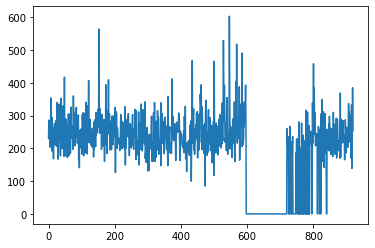

In [4]:
df[df.chol!='?'].chol.plot()

In [5]:
df=df[df.fbs!='?']

In [6]:
df=df[df.restecg!='?']

In [7]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps     object
chol         object
fbs          object
restecg      object
thalanch     object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
num         float64
dtype: object

In [8]:
df=df[df.chol!='?'].dropna()

In [9]:
df=df[df.thalanch!='?'].dropna()

In [10]:
df=df[df.exang!='?'].dropna()

In [11]:
df=df[df.trestbps!='?'].dropna()

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalanch,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0,6,0.0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3,3,2.0
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2,7,1.0
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0,3,0.0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62.0,1.0,4.0,158,170,0,1,138,1,0,?,?,?,1.0
914,46.0,1.0,4.0,134,310,0,0,126,0,0,?,?,3,2.0
915,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1.0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2.0


In [12]:
df=df[df.trestbps>10]

In [13]:
df=df[df.thalanch>60]

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df=df[df.chol!='?']

In [16]:
df=df.drop(columns=['slope','ca','thal'])

In [17]:
df=df[df.trestbps>50]
df.thalanch=df.thalanch.astype('float64')
df.describe()

,age,sex,cp,thalanch,num
count,742.000000,742.000000,742.000000,742.000000,742.000000
mean,53.128032,0.765499,3.222372,138.905660,0.920485
std,9.410910,0.423973,0.942553,25.708408,1.127684
min,28.000000,0.000000,1.000000,63.000000,0.000000
25%,46.000000,1.000000,2.000000,120.000000,0.000000
50%,54.000000,1.000000,4.000000,140.000000,1.000000
75%,60.000000,1.000000,4.000000,160.000000,1.000000
max,77.000000,1.000000,4.000000,202.000000,4.000000


In [21]:
df.to_csv('properly_cleaned_data.csv')

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalanch,exang,oldpeak,num
0,63.0,1.0,1.0,145,233,1,2,150.0,0,2.3,0.0
1,67.0,1.0,4.0,160,286,0,2,108.0,1,1.5,2.0
2,67.0,1.0,4.0,120,229,0,2,129.0,1,2.6,1.0
3,37.0,1.0,3.0,130,250,0,0,187.0,0,3.5,0.0
4,41.0,0.0,2.0,130,204,0,2,172.0,0,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
913,62.0,1.0,4.0,158,170,0,1,138.0,1,0,1.0
914,46.0,1.0,4.0,134,310,0,0,126.0,0,0,2.0
915,54.0,0.0,4.0,127,333,1,1,154.0,0,0,1.0
917,55.0,1.0,4.0,122,223,1,1,100.0,0,0,2.0


In [20]:
df.fbs.unique()

array([1.0, 0.0], dtype=object)